11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


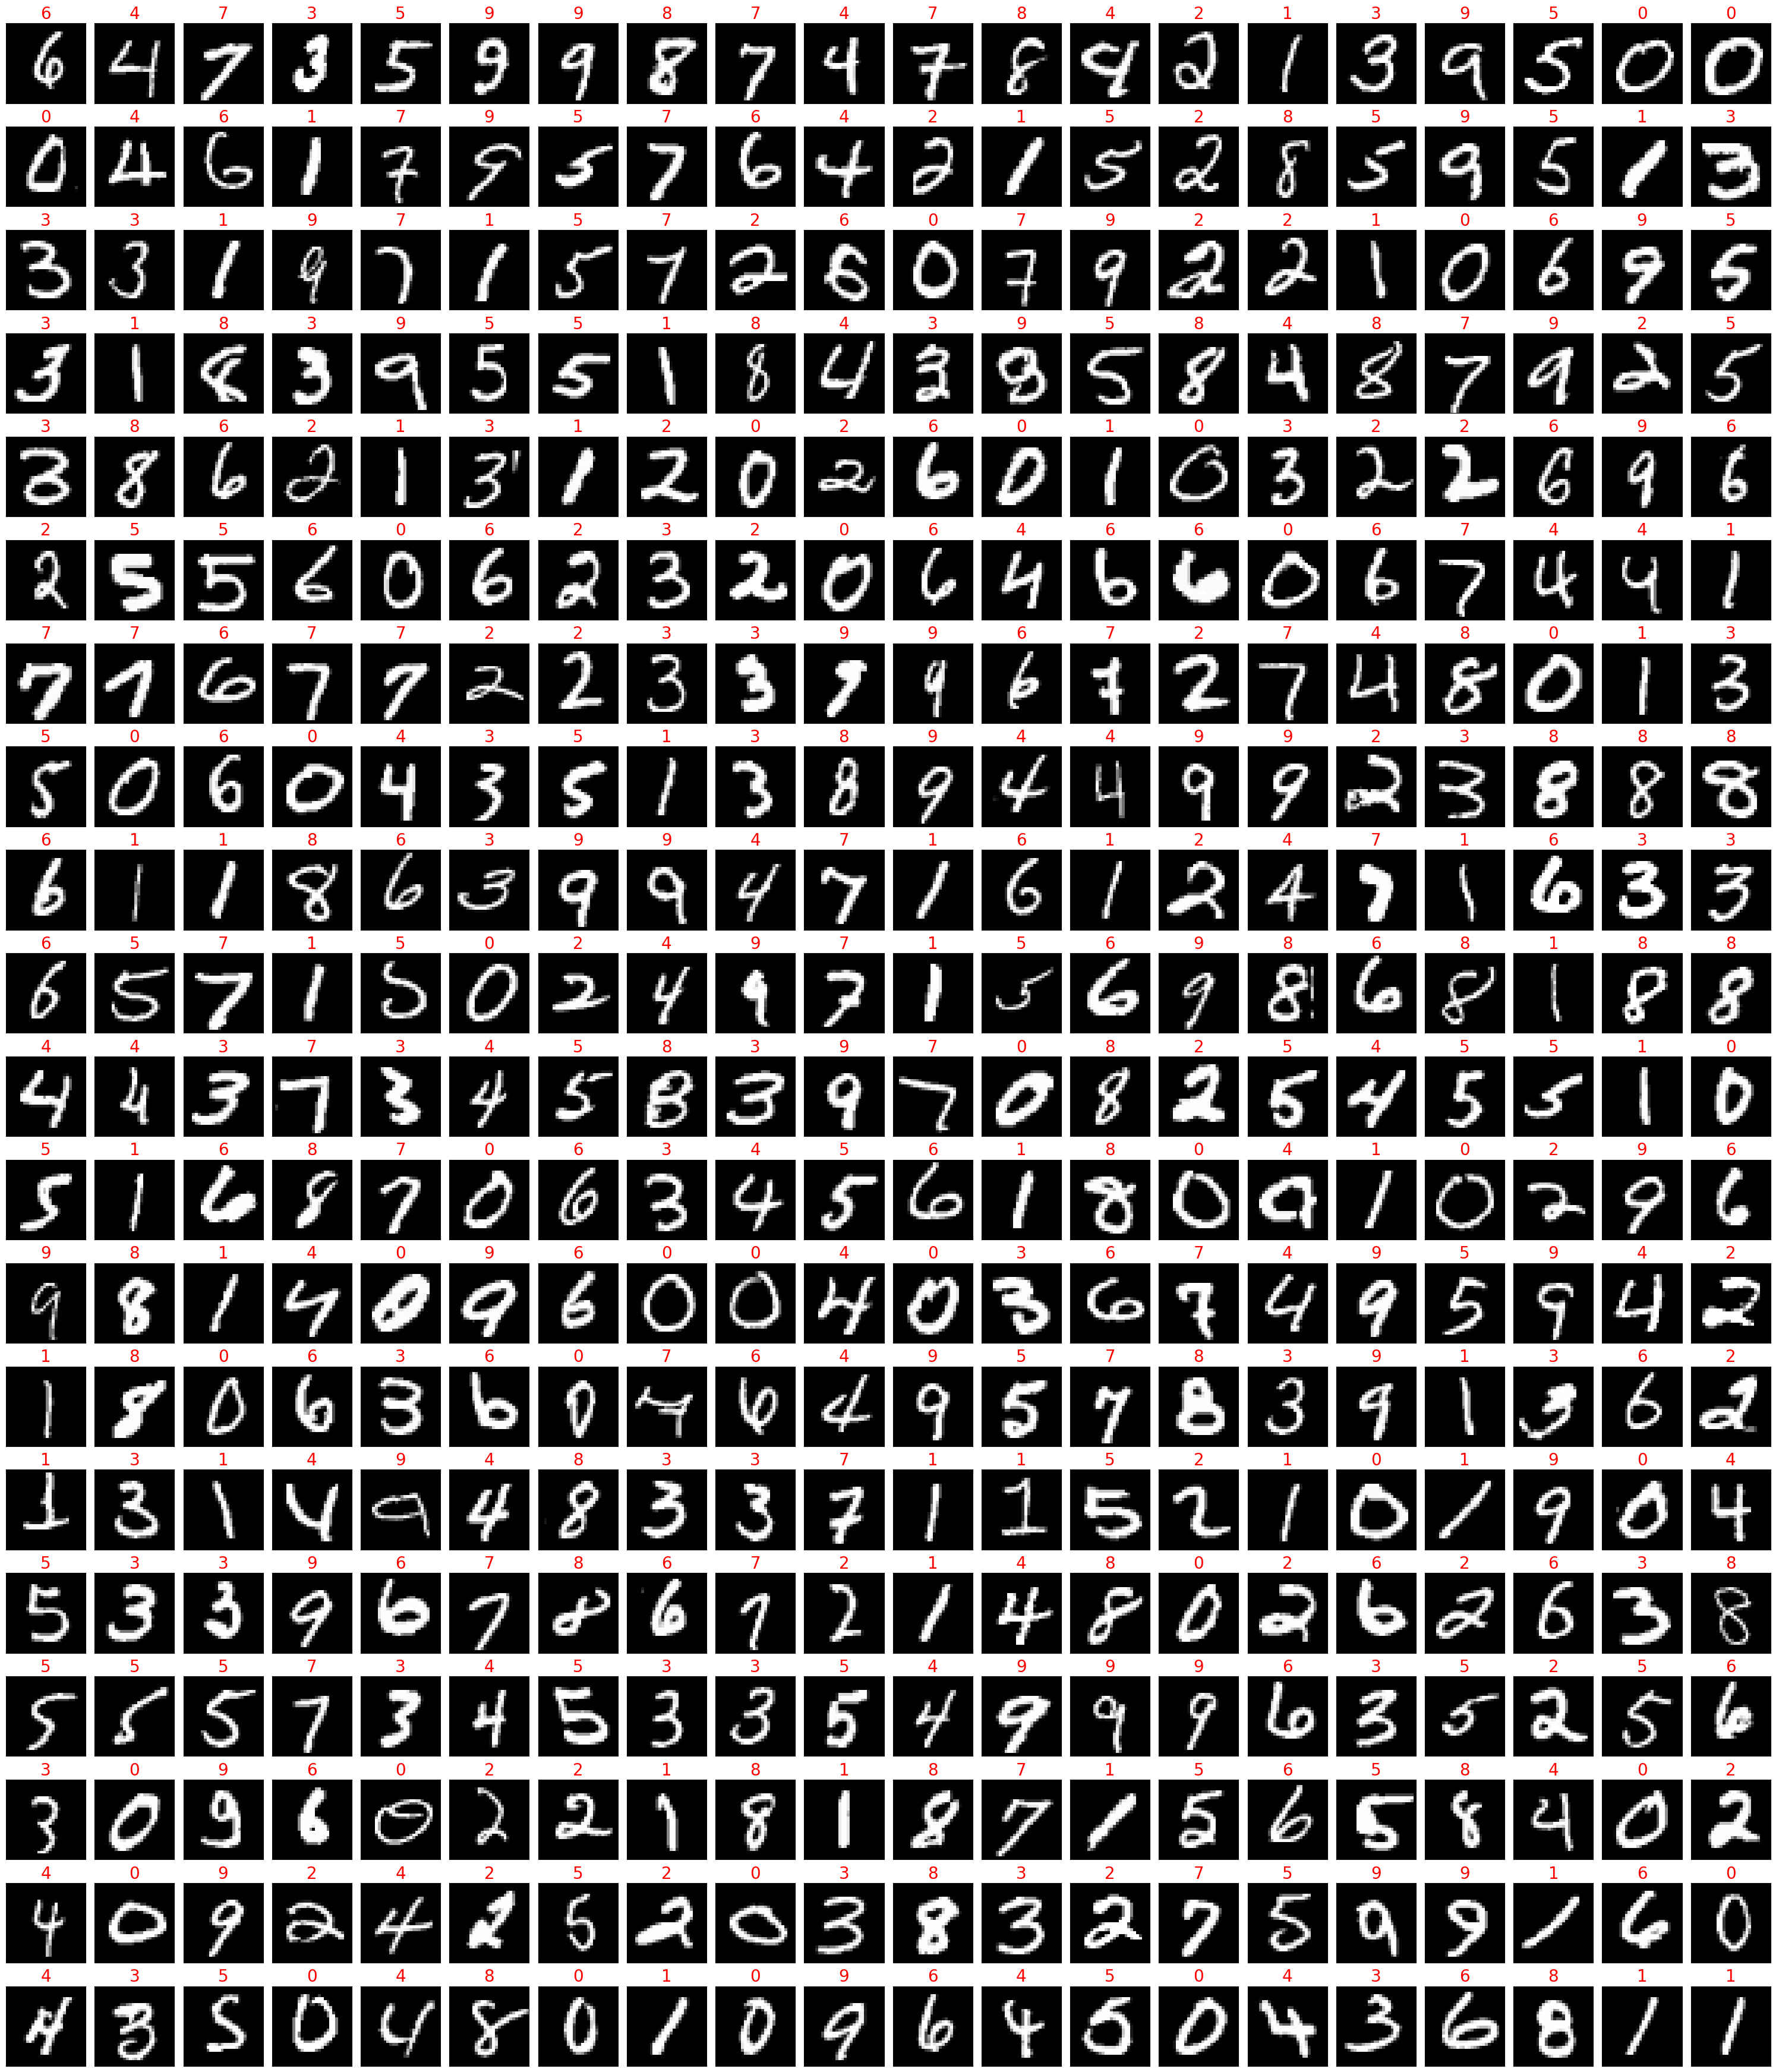

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,654 (623.65 KB)

 Trainable params: 159,454 (622.87 KB)

 Non-trainable params: 200 (800.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - accuracy: 0.9209 - loss: 0.2612 - val_accuracy: 0.9868 - val_loss: 0.0460
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.9847 - loss: 0.0497 - val_accuracy: 0.9836 - val_loss: 0.0549
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9893 - loss: 0.0337 - val_accuracy: 0.9922 - val_loss: 0.0265
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accuracy: 0.9894 - val_loss: 0.0313
Epoch 5/5
271/938 ━━━━━━━━━━━━━━━━━━━━ 52s 79ms/step - accuracy: 0.9953 - loss: 0.0198

In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split as tts

# Carga de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# One-hot encoding
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

# Mostrar algunas imágenes aleatorias
def show_images():
    array = np.random.choice(len(x_train), size=400, replace=False)
    fig = plt.figure(figsize=(30, 35))
    for i in range(400):
        fig.add_subplot(20, 20, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(y_train[array[i]], color='red', fontsize=20)
        plt.imshow(x_train[array[i]], cmap="gray")
    plt.tight_layout()
    plt.show()

show_images()

# Redimensionamiento para la CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# División en validación y test
x_val, x_test_final, y_val, y_test_final = tts(x_test, y_test_enc, test_size=0.5, random_state=42)

# Definición del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compilación
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

model.summary()

# Entrenamiento del modelo
history = model.fit(
    x_train, y_train_enc,
    validation_data=(x_val, y_val),
    epochs=5,
    batch_size=64
)

# Visualización de métricas
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluación final
metrics = model.evaluate(x_test_final, y_test_final)
print("Test Accuracy: {:.2f}%".format(metrics[1] * 100))
print("Test Loss: {:.2f}".format(metrics[0]))

# Guardar y cargar modelo
model.save('my_model.h5')  # Usa .h5 para claridad

loaded_model = tf.keras.models.load_model('my_model.h5')
loaded_metrics = loaded_model.evaluate(x_test_final, y_test_final)
print("Loaded Model Accuracy: {:.2f}%".format(loaded_metrics[1] * 100))
print("Loaded Model Loss: {:.2f}".format(loaded_metrics[0]))

# Visualización de predicciones
def test_images(n=10):
    idx = np.random.choice(len(x_test_final), size=n, replace=False)
    fig = plt.figure(figsize=(n, 4))
    for i in range(n):
        img = x_test_final[idx[i]].reshape(1, 28, 28, 1)
        prediction = loaded_model.predict(img, verbose=0)
        pred_label = np.argmax(prediction)
        true_label = np.argmax(y_test_final[idx[i]])
        fig.add_subplot(2, n // 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test_final[idx[i]].reshape(28, 28), cmap='gray')
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"Pred: {pred_label}", color=color)
    plt.tight_layout()
    plt.show()

test_images(10)

import cv2

def number_recognize(filepath):
    image = cv2.imread(filepath)
    image = cv2.medianBlur(image, 7)
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(grey, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 33, 25)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=2)
        digit = thresh[y:y + h, x:x + w]
        resized_digit = cv2.resize(digit, (18, 18))
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
        preprocessed_digits.append(padded_digit)

    plt.imshow(image, cmap="gray")
    plt.title("Contoured Image", color='red')
    plt.show()

    inp = np.array(preprocessed_digits)
    figr = plt.figure(figsize=(len(inp), 4))
    nums = []
    for i, digit in enumerate(preprocessed_digits):
        [prediction] = loaded_model.predict(digit.reshape(1, 28, 28, 1) / 255.)
        pred = np.argmax(prediction)
        nums.append(pred)
        figr.add_subplot(1, len(inp), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred)
    print("The Recognized Numbers are:", *nums)

number_recognize('2.jpg')
number_recognize('3.jpg')
number_recognize('4.jpg')
number_recognize('5.jpg')
number_recognize('6.jpg')